<a href="https://colab.research.google.com/github/JonasRiber/Dl_project_HAM10000/blob/main/Ham10000_project_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### trying to load
!pip install deeplake # install the deeplake package

import deeplake # import the deeplake package

ds = deeplake.load('hub://activeloop/ham10000')
ds.summary()

|

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/ham10000



|

hub://activeloop/ham10000 loaded successfully.

Dataset(path='hub://activeloop/ham10000', read_only=True, tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])

      tensor           htype            shape           dtype  compression
      -------         -------          -------         -------  ------- 
       ages         class_label       (10015, 1)       uint32    None   
      genders       class_label       (10015, 1)       uint32    None   
     image_ids      class_label       (10015, 1)       uint32    None   
      images           image     (10015, 450, 600, 3)   uint8    jpeg   
 lesion_categories  class_label       (10015, 1)       uint32    None   
    lesion_ids      class_label       (10015, 1)       uint32    None   
   localizations    class_label       (10015, 1)       uint32    None   
      sources       class_label       (10015, 1)       uint32    None   


## Visualising data

(450, 600, 3)


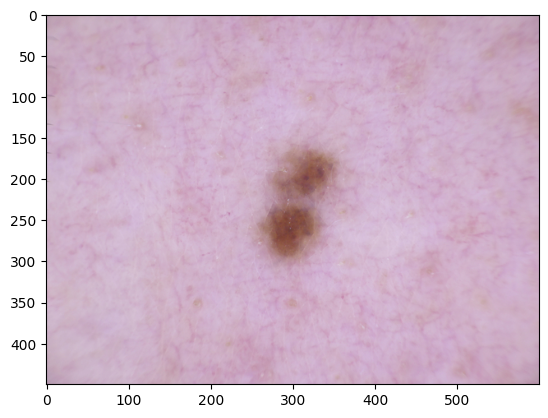

In [ ]:
import matplotlib.pyplot as plt
# showcase a single image
image = ds.images[0].numpy()

print(image.shape) # shape of the images
#show the image
plt.imshow(image)
plt.show()


In [ ]:
# Check the first few entries of the dataset
for sample in ds[:5]:
    print(sample)

Dataset(path='hub://activeloop/ham10000', read_only=True, index=Index([0]), tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])
Dataset(path='hub://activeloop/ham10000', read_only=True, index=Index([1]), tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])
Dataset(path='hub://activeloop/ham10000', read_only=True, index=Index([2]), tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])
Dataset(path='hub://activeloop/ham10000', read_only=True, index=Index([3]), tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])
Dataset(path='hub://activeloop/ham10000', read_only=True, index=Index([4]), tensors=['ages', 'genders', 'image_ids', 'images', 'lesion_categories', 'lesion_ids', 'localizations', 'sources'])


## Base line model


In [ ]:

import numpy as np
# Extract images and labels
images = []
labels = []  # Define the labels list

# Iterate through the dataset
for sample in ds[:3000]:#[:200]just to speed up testing of the code
    images.append(sample['images'].numpy())  # Extract image data
    labels.append(sample['lesion_categories'].numpy())  # Extract lesion categories as labels



KeyboardInterrupt: 

## looking though the entyre data set to maximise the number of pictures from classes with few.

In [ ]:


import numpy as np

images = []
labels = []
max_samples_per_label = 1000

unique_labels = np.unique(ds.lesion_categories.numpy())

for label in unique_labels:
    label_indices = np.where(ds.lesion_categories.numpy() == label)[0]
    selected_indices = label_indices[:max_samples_per_label]

    for idx in selected_indices:
        images.append(ds.images[int(idx)].numpy()) # Cast idx to int using int(idx)
        labels.append(ds.lesion_categories[int(idx)].numpy()) # Cast idx to int using int(idx)


/usr/local/lib/python3.10/dist-packages/deeplake/core/tensor.py:719: UserWarning: Indexing by integer in a for loop, like `for i in range(len(ds)): ... ds.tensor[i]` can be quite slow. Use `for i, sample in enumerate(ds)` instead.
  warnings.warn(


In [ ]:
print(labels)

[array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], dtype=uint32), array([0], 

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
# Preprocess images: resize to 128x128 and normalize
images = np.array([img_to_array(array_to_img(image, scale=False).resize((120, 120))) for image in images])
images = images / 255.0  # Normalize pixel values between 0 and 1

# Convert labels to a flat array
labels = np.array(labels).flatten()



In [ ]:

def labels_count(labels):
    count = {}
    for label in labels:
        if label not in count:
            count[label] = 0
        count[label] += 1
    return count
print(labels_count(labels))
print(3316/5000)
print(set(labels))


'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
'''

{0: 1000, 1: 1000, 2: 115, 3: 1000, 4: 142, 5: 514, 6: 327}
0.6632
{0, 1, 2, 3, 4, 5, 6}


'\nprint(X_train.shape)\nprint(y_train.shape)\nprint(X_test.shape)\nprint(y_test.shape)\n'

## Balance the dataset

In [ ]:
import numpy as np

def balance_dataset(images, labels, num_samples_per_class=115): ## num_samples_per_class: change to control class size
  """Balances the dataset by undersampling.

  Args:
    images: List of images.
    labels: List of corresponding labels.
    num_samples_per_class: The desired number of samples per class.

  Returns:
    balanced_images: List of balanced images.
    balanced_labels: List of balanced labels.
  """

  unique_labels = set(labels)
  balanced_images = []
  balanced_labels = []

  for label in unique_labels:
    indices = [i for i, x in enumerate(labels) if x == label]
    if len(indices) > num_samples_per_class:
      indices = np.random.choice(indices, size=num_samples_per_class, replace=False)
    balanced_images.extend(images[i] for i in indices)
    balanced_labels.extend(labels[i] for i in indices)

  return np.array(balanced_images), np.array(balanced_labels)

# Example usage
balanced_images, balanced_labels = balance_dataset(images, labels)


## intalize x and y

In [ ]:
## normal
'''

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

## undersampled
'''
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42, stratify=balanced_labels) # Use balanced_labels for stratification

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)



In [ ]:
print(labels_count(balanced_labels))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

{0: 115, 1: 115, 2: 115, 3: 115, 4: 115, 5: 115, 6: 115}
(644, 120, 120, 3)
(644, 7)
(161, 120, 120, 3)
(161, 7)


## transsfer leaning

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet

conv_base = MobileNet(weights='imagenet',
                      include_top=False,
                      input_shape=(120, 120, 3))

<ipython-input-12-6fb272d3f88a>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = MobileNet(weights='imagenet',


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, UpSampling2D, Conv2D, Reshape

# Define the decoder model
decoder = Sequential([
    UpSampling2D(size=(2, 2)),  # Upsample by a factor of 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),  # Upsample by a factor of 2
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D(size=(2, 2)),  # Upsample by a factor of 2
    Conv2D(7, (3, 3), activation='sigmoid', padding='same'),  # Output layer with 3 channels (RGB)
    #Reshape((120, 120, 3))  # Reshape to match the original image dimensions
])

In [ ]:
# Assuming you have 'conv_base' as your MobileNet encoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten

# Define the input layer
input_layer = Input(shape=(120, 120, 3))

# Connect the encoder and decoder
encoded_features = conv_base(input_layer)
decoded_output = decoder(encoded_features)

# Add a Flatten layer if you are doing classification
decoded_output = Flatten()(decoded_output)  # Flatten the output for classification
decoded_output = Dense(7, activation='softmax')(decoded_output)  # 7 output units with softmax activation


# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded_output)

# Compile the model
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use an appropriate loss function

# Now you can train the 'autoencoder' model

In [ ]:
autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 120, 120, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenet_1.00_224 (Functional)      │ (None, 3, 3, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 24, 24, 7)           │         610,375 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,839,239 (14.65 MB)

 Trainable params: 3,817,351 (14.56 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
## just testing

## Run model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam

# Initiate Adam optimizer (a variant of Stochastic Gradient Descent)
# (Note: this choice is somewhat arbitrary - see options here: https://keras.io/api/optimizers/)
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9)
opt = Adam(learning_rate=lr_schedule)

# Compile the model
autoencoder.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


# Normalize image data
x_train = X_train.astype('float32')
x_test = X_test.astype('float32')
x_train /= 255.0  # Normalize images to range [0, 1]
x_test /= 255.0


data_augmentation = True
epochs = 15
batch_size = 16

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = autoencoder.fit(datagen.flow(x_train, y_train,
                           batch_size=batch_size),
              epochs=epochs,
              validation_data=(x_test, y_test),

              shuffle=True)

Using real-time data augmentation.
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 391ms/step - accuracy: 0.9845 - loss: 0.0538 - val_accuracy: 0.6522 - val_loss: 1.6287
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9714 - loss: 0.0924 - val_accuracy: 0.6211 - val_loss: 1.9454
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9760 - loss: 0.0559 - val_accuracy: 0.6894 - val_loss: 1.5162
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9836 - loss: 0.0467 - val_accuracy: 0.6522 - val_loss: 1.5915
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.9852 - loss: 0.0448 - val_accuracy: 0.6770 - val_loss: 1.4886
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9792 - loss: 0.0428 - val_accuracy: 0.6957 - val_loss: 1.6962
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9832 - loss: 0.0428 - val_accuracy: 0.6957 - val_loss: 1.5716
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9820 - loss: 0.0555 - val_accuracy: 0.6708 - val_loss:

## Testing model

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


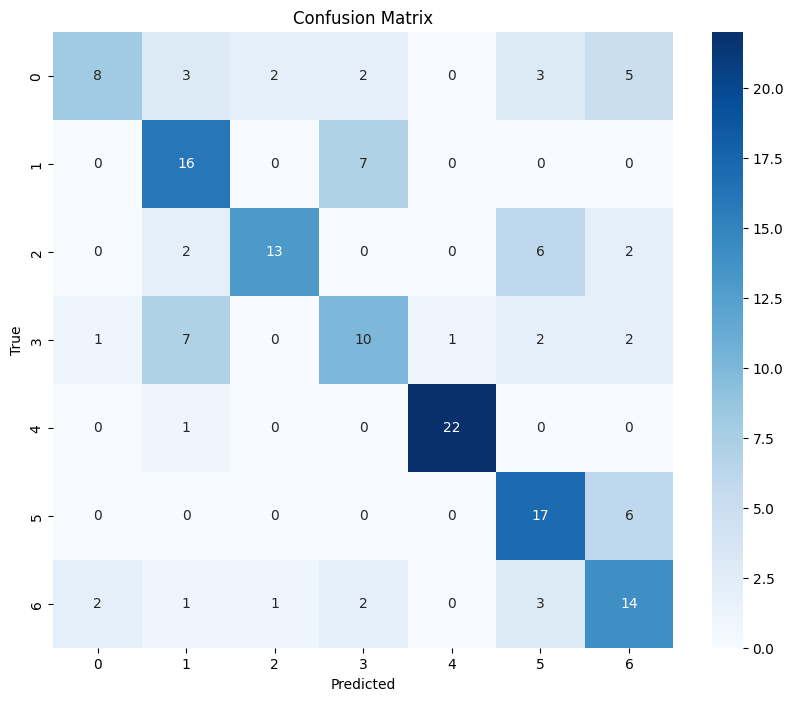

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have 'model', 'x_test', and 'y_test' defined
# and 'results = model.evaluate(x_test, y_test, batch_size=32)' has been executed

# 1. Get predictions
y_pred = autoencoder.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
#print(y_pred_classes)

# 2. Get true labels
y_true_classes = np.argmax(y_test, axis=1)
#print(y_true_classes)

# 3. Generate confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# 4. Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2', '3', '4', '5', '6'],
            yticklabels=['0', '1', '2', '3', '4', '5', '6'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(y_pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


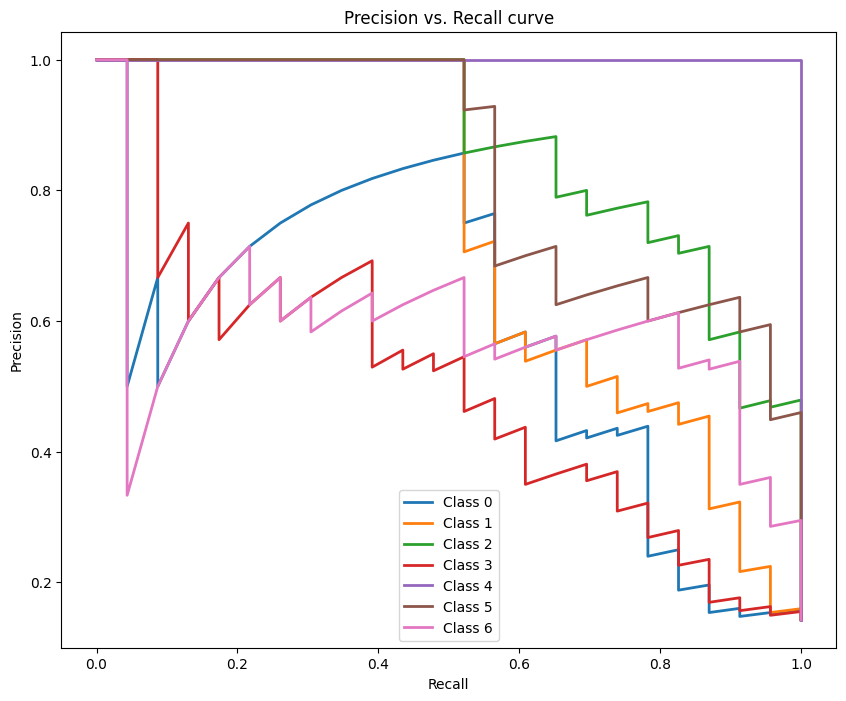

Average precision for class 0: 0.5861
Average precision for class 1: 0.7417
Average precision for class 2: 0.8681
Average precision for class 3: 0.5096
Average precision for class 4: 1.0000
Average precision for class 5: 0.8362
Average precision for class 6: 0.5995


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming you have 'model', 'x_test', and 'y_test' defined
# and 'results = model.evaluate(x_test, y_test, batch_size=32)' has been executed

# 1. Get predictions
y_pred = autoencoder.predict(x_test)

# 2. Calculate precision-recall for each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = 7 # 7 classes
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

# 3. Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], lw=2, label='Class {}'.format(i))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best")
plt.title("Precision vs. Recall curve")
plt.show()

# 4. Calculate and print average precision for each class
for i in range(n_classes):
    print(f"Average precision for class {i}: {average_precision[i]:.4f}")

In [ ]:
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss (if you used a validation set)

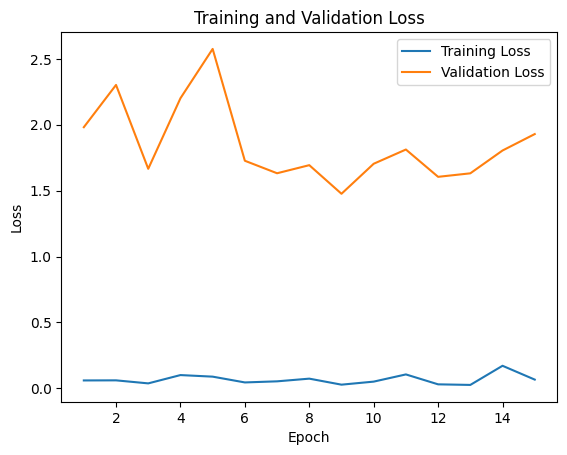

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()